# Data Analysis for MTA Subway on-time performance 2015-2019

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Import data

In [2]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


## Data cleaning

In [3]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015
...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

month                           0
line                            0
division                        0
day_type                        0
num_on_time_trips               0
num_sched_trips                 0
terminal_on_time_performance    0
date                            0
year                            0
dtype: int64

### Data analysis

In [6]:
# identify the subway lines with the highest and lowest on-time performance
performance = df.groupby(['line'])['terminal_on_time_performance'].mean()
print(performance['Systemwide'])
performance = performance[~performance.index.isin(['Systemwide'])]
performance = performance.sort_values(ascending=False)
highest = performance.index[0]
lowest = performance.index[-1]
print('The subway line with the highest on-time performance is', highest)
print('The subway line with the lowest on-time performance is', lowest)
performance

0.7139489073043478
The subway line with the highest on-time performance is S Fkln
The subway line with the lowest on-time performance is 2


line
S Fkln    0.995330
S 42nd    0.991914
S Rock    0.949690
L         0.920765
7         0.798462
1         0.772141
G         0.750651
Q         0.731510
M         0.714654
JZ        0.708985
W         0.694793
E         0.692192
C         0.691040
3         0.659998
D         0.652270
R         0.646497
N         0.643439
B         0.637599
A         0.633404
6         0.604459
F         0.579645
5         0.542960
4         0.513078
2         0.486564
Name: terminal_on_time_performance, dtype: float64

In [7]:
# Investigate how on-time performance has changed over time
performance = df.groupby(['year'])['terminal_on_time_performance'].mean()
performance = performance[~performance.index.isin(['Systemwide'])]
performance = performance.sort_values(ascending=False)
performance

year
2019    0.812701
2015    0.699366
2016    0.670613
2018    0.664802
2017    0.632053
Name: terminal_on_time_performance, dtype: float64

In [8]:
# Compare the on-time performance of the A Division and B Division.
performance = df.groupby(['division'])['terminal_on_time_performance'].mean()
performance = performance[~performance.index.isin(['Systemwide'])]
performance = performance.sort_values(ascending=False)
performance

division
B DIVISION    0.730036
A DIVISION    0.671197
Name: terminal_on_time_performance, dtype: float64

In [9]:
# Analyze how on-time performance varies by day type (weekday vs. weekend).
performance = df.groupby(['day_type'])['terminal_on_time_performance'].mean()
performance = performance[~performance.index.isin(['Systemwide'])]
performance = performance.sort_values(ascending=False)
performance

day_type
2    0.839937
1    0.691395
Name: terminal_on_time_performance, dtype: float64

### Plotting data

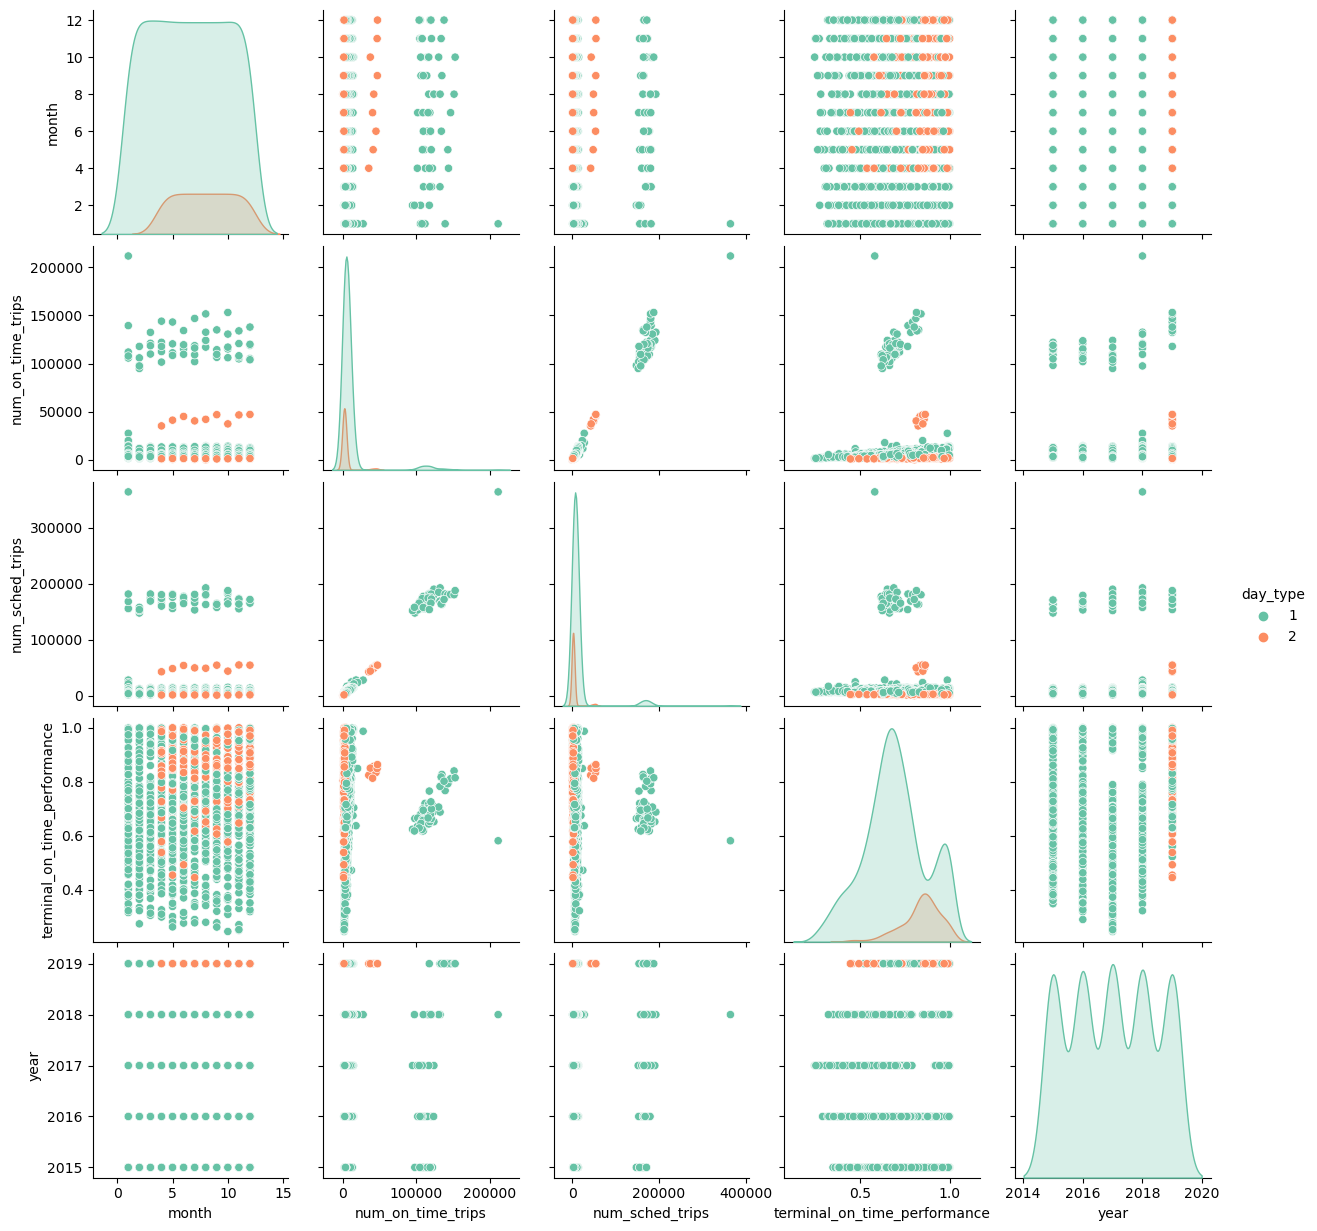

In [10]:
# Create a pairplot to discover relationships between different numeric variables.
sns.pairplot(df, hue='day_type', palette='Set2', diag_kind='kde').savefig('../static/images/pairplot.png')

C:\Users\olowu\AppData\Local\Temp\ipykernel_9012\1520696832.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


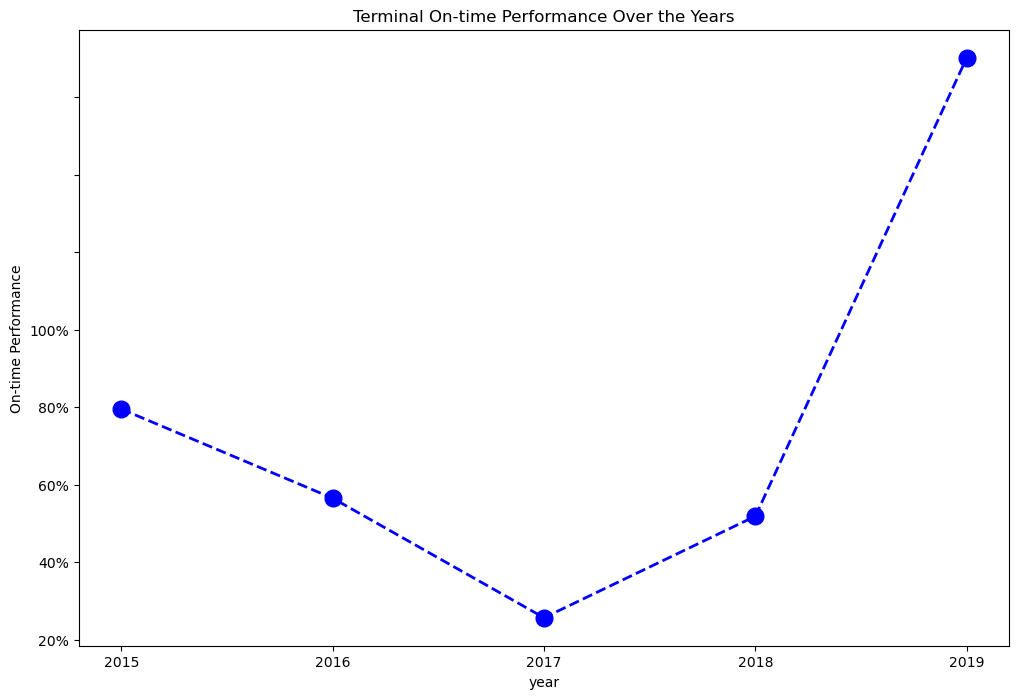

In [11]:
# Create line charts to show how on-time performance has changed over time for each subway line.

plt.figure(figsize=(12, 8))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xlabel('Year')
plt.ylabel('On-time Performance')
plt.title('Terminal On-time Performance Over the Years')
plt.xticks(df['year'].unique())
df.groupby(['year'])['terminal_on_time_performance'].mean().plot(kind='line', color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()



C:\Users\olowu\AppData\Local\Temp\ipykernel_9012\991483016.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


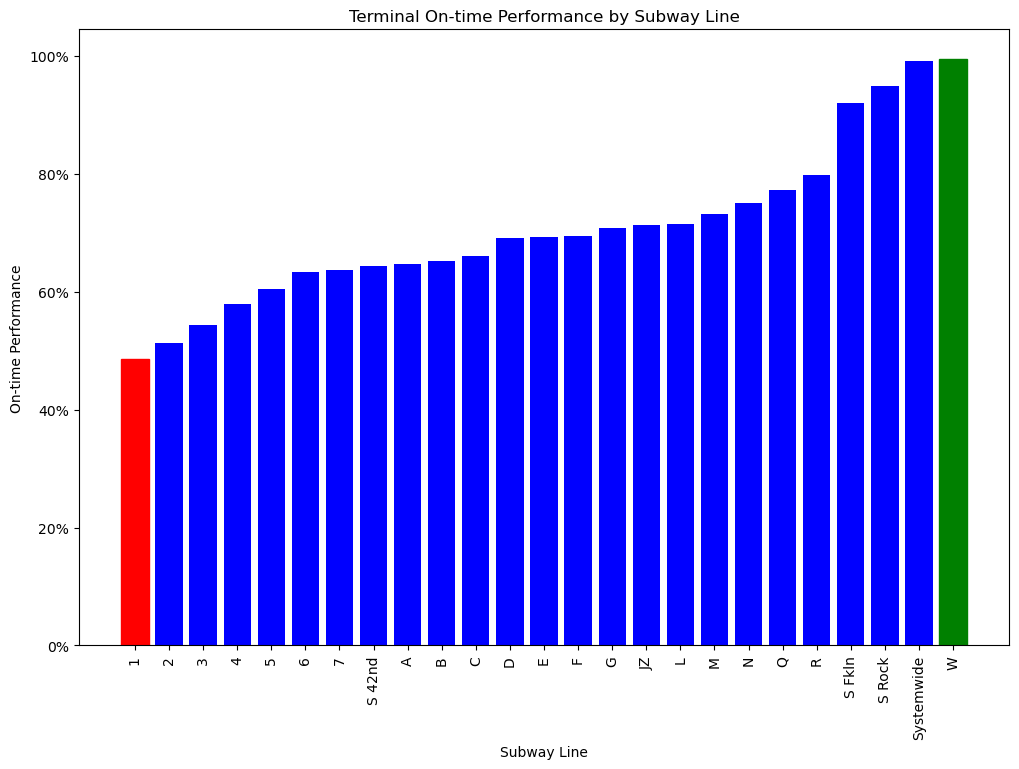

In [17]:
# Create bar charts to compare the on-time performance of different subway lines. Use different colors to highlight the best and worst performers.
plt.figure(figsize=(12, 8))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xlabel('Subway Line')
plt.ylabel('On-time Performance')
plt.title('Terminal On-time Performance by Subway Line')
plt.xticks(rotation=90)
bar = plt.bar(df['line'].unique(), df.groupby(['line'])['terminal_on_time_performance'].mean().sort_values(), color='blue')
bar[0].set_color('red')
bar[-1].set_color('green')
plt.show()

C:\Users\olowu\AppData\Local\Temp\ipykernel_9012\1053126107.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2, annot_kws={'size': 12}, fmt='.2f')


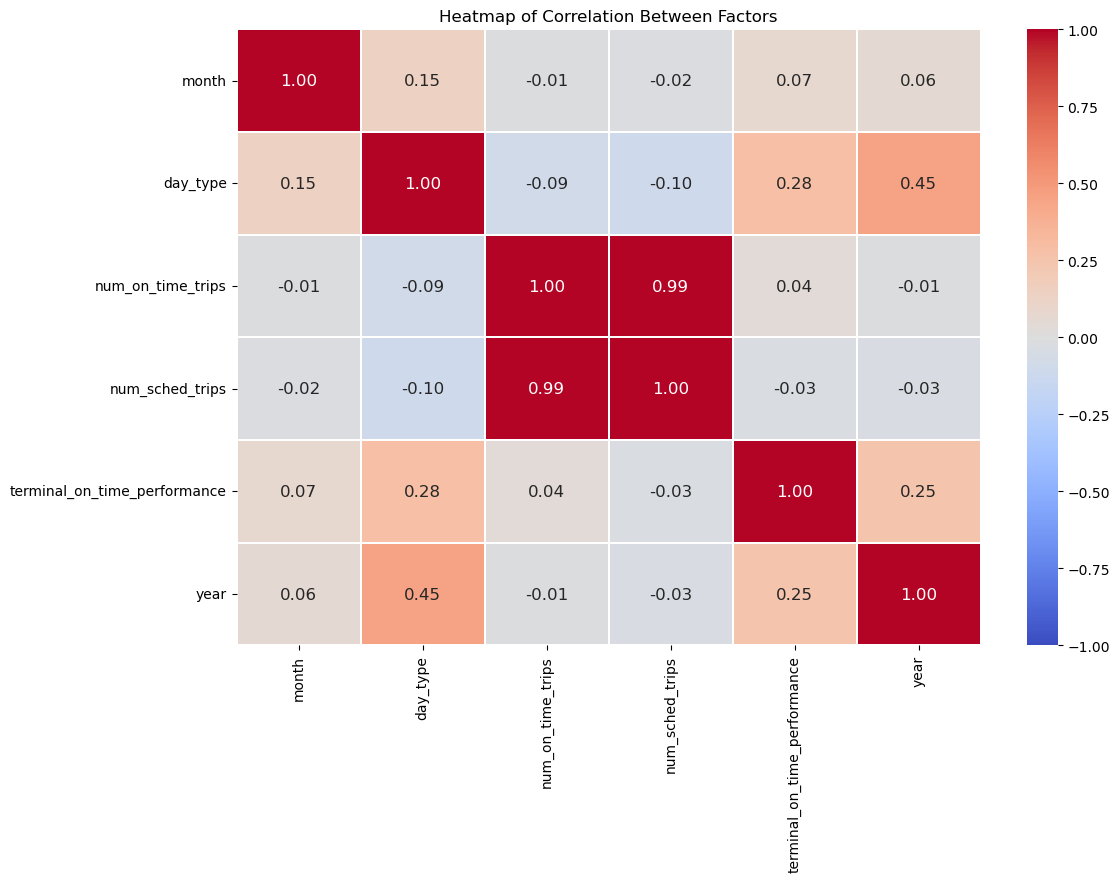

In [14]:
# Create a heatmap to visualize the correlation between factors like month, day type, and on-time performance.
plt.figure(figsize=(12, 8))
plt.title('Heatmap of Correlation Between Factors')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2, annot_kws={'size': 12}, fmt='.2f')
plt.savefig('../static/images/heatmap.png')
plt.show()